# Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

### Attribute Information:

1) sepal length in cm
2) sepal width in cm
3) petal length in cm
4) petal width in cm

### class:
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica 

# import modules

In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Iris.csv')

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# delete a column
df = df.drop(columns = ['Id'])

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# statistics about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Preprocessing the dataset

In [17]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

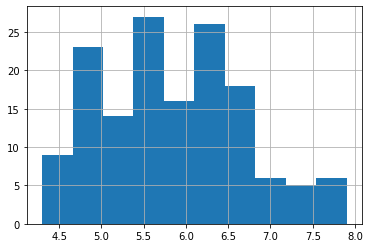

In [18]:
# histograms
df['SepalLengthCm'].hist()

<AxesSubplot:>

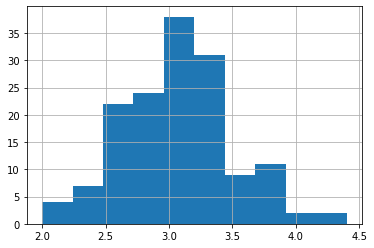

In [19]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

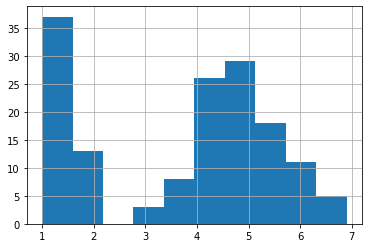

In [20]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

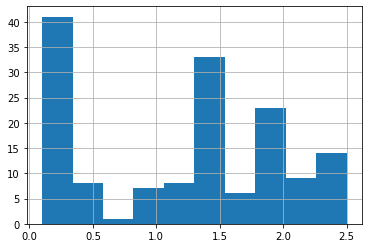

In [22]:
df['PetalWidthCm'].hist()

In [28]:
# scatterplot
colors = ['red', 'yellow', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

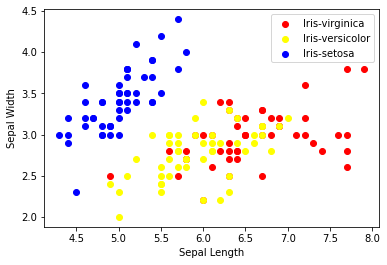

In [30]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

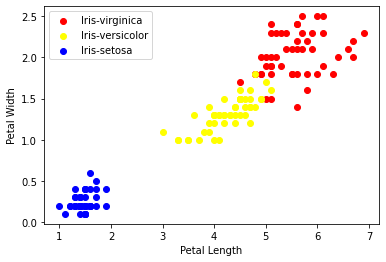

In [31]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

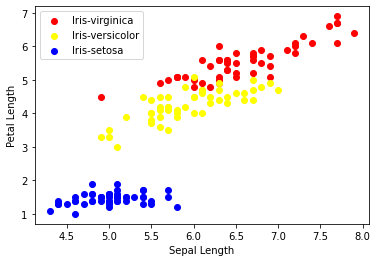

In [33]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

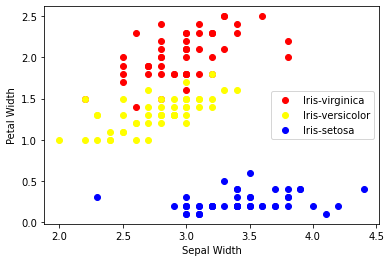

In [34]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Corelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [35]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

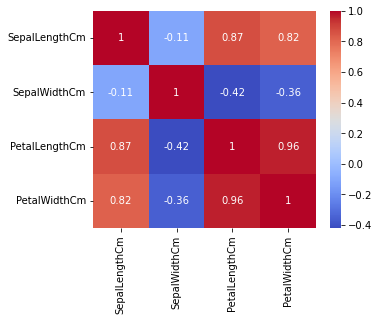

In [39]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (5, 4))
# sns.heatmap(corr, annot = True, ax = ax)
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

## LabelEncoder

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [90]:
from sklearn.model_selection import train_test_split
# train - 70, test - 30
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [91]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [92]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [93]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [94]:
# knn - k - nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [95]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [96]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [97]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [98]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [99]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [101]:
# save the model
import pickle
filename = 'IrisClassifier.sav'
pickle.dump(model, open(filename, 'wb'))

In [102]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
93,5.0,2.3,3.3,1.0
32,5.2,4.1,1.5,0.1
28,5.2,3.4,1.4,0.2
43,5.0,3.5,1.6,0.6


In [103]:
load_model = pickle.load((open(filename, 'rb')))

In [110]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array([1])